In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='TotalCharges'>

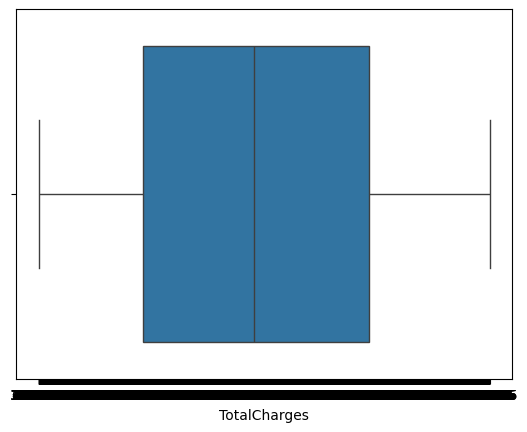

In [12]:
sns.boxplot(x=df['TotalCharges'])

<Axes: xlabel='MonthlyCharges'>

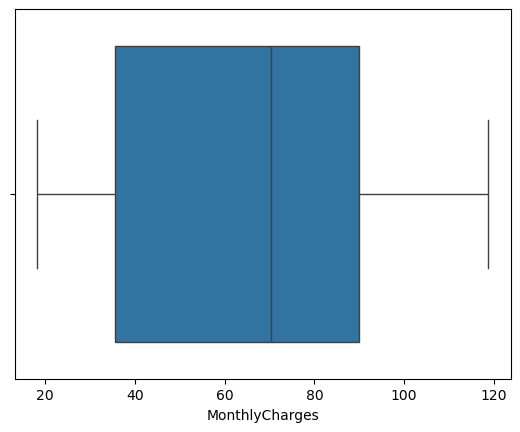

In [13]:
sns.boxplot(x=df['MonthlyCharges'])

<Axes: xlabel='Churn', ylabel='Count'>

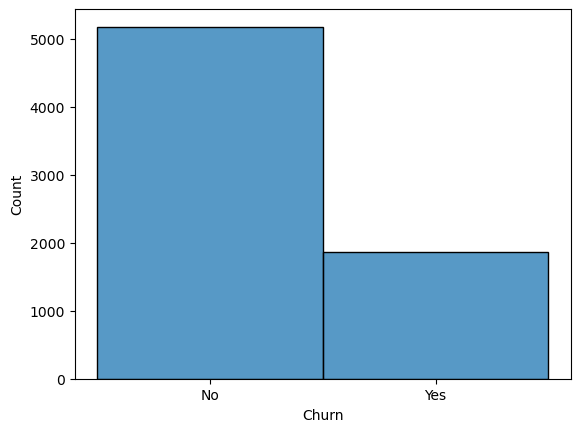

In [14]:
sns.histplot(df['Churn'])

<Axes: xlabel='Churn', ylabel='gender'>

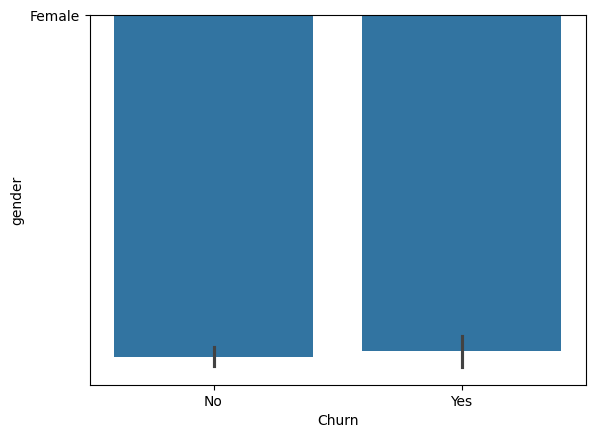

In [16]:
sns.barplot(y=df['gender'] , x=df['Churn'])

<Axes: xlabel='StreamingMovies', ylabel='Churn'>

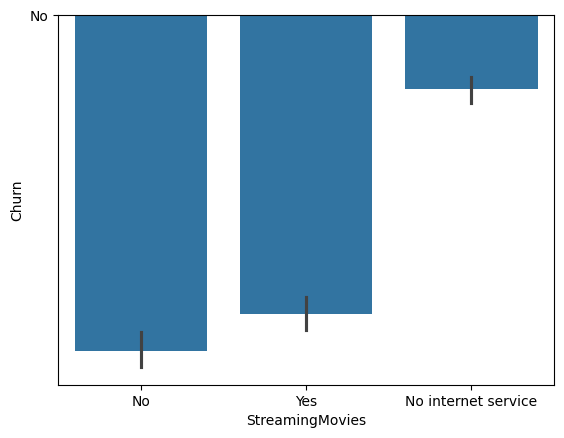

In [18]:
sns.barplot(x=df['StreamingMovies'] , y=df['Churn'])

In [20]:
df = df.drop(columns='customerID' , axis=1)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

In [44]:
df_encode = df.copy()

In [45]:
encode_cols = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection',
              'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling']
le = LabelEncoder()
for i in encode_cols:
    df_encode[i] = le.fit_transform(df_encode[i])

In [47]:
df_encode['Churn'] = le.fit_transform(df_encode['Churn'])

In [51]:
one_cols = ['InternetService' , 'Contract' , 'PaymentMethod']
dummies = pd.get_dummies(df_encode[one_cols] , drop_first=True , dtype=int)
df_encode = pd.concat([df_encode.drop(columns=one_cols) , dummies] , axis=1)

In [68]:
df_encode['TotalCharges'] = pd.to_numeric(df_encode['TotalCharges'])
df_encode['TotalCharges'] = df_encode['TotalCharges'].fillna(0).astype(float)

In [72]:
X = df_encode.drop(columns='Churn' , axis=1)
y = df_encode['Churn']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [74]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [76]:
y_pred = model.predict(X_test)

In [78]:
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.815471965933286
[[941  95]
 [165 208]]
